In [2]:

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, confusion_matrix

from sklearn.preprocessing import LabelEncoder

import joblib
from sklearn.metrics import classification_report, accuracy_score

In [4]:
data = pd.read_excel('/content/Prediction.xlsx')


In [5]:
data.head(5)

,Unnamed: 0,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
0,0,19877-DEL,Male,35,No,Delhi,7,27,NaN,Yes,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,1,58353-MAH,Female,45,Yes,Maharashtra,14,13,NaN,Yes,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,2,25063-WES,Male,51,No,West Bengal,4,35,Deal 5,Yes,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,3,59787-KAR,Male,79,No,Karnataka,3,21,Deal 4,Yes,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,4,28544-TAM,Female,80,No,Tamil Nadu,3,8,NaN,Yes,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [6]:
print("Columns in dataset:\n", data.columns.tolist())
print("\nFirst 5 rows:\n", data.head())
print("\nCustomer_Status unique values:\n", data['Customer_Status'].unique())
print("\nCustomer_Status value counts:\n", data['Customer_Status'].value_counts(dropna=False))

Columns in dataset:
 ['Unnamed: 0', 'Customer_ID', 'Gender', 'Age', 'Married', 'State', 'Number_of_Referrals', 'Tenure_in_Months', 'Value_Deal', 'Phone_Service', 'Multiple_Lines', 'Internet_Service', 'Internet_Type', 'Online_Security', 'Online_Backup', 'Device_Protection_Plan', 'Premium_Support', 'Streaming_TV', 'Streaming_Movies', 'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing', 'Payment_Method', 'Monthly_Charge', 'Total_Charges', 'Total_Refunds', 'Total_Extra_Data_Charges', 'Total_Long_Distance_Charges', 'Total_Revenue', 'Customer_Status', 'Churn_Category', 'Churn_Reason']

First 5 rows:
    Unnamed: 0 Customer_ID  Gender  Age Married        State  \
0           0   19877-DEL    Male   35      No        Delhi   
1           1   58353-MAH  Female   45     Yes  Maharashtra   
2           2   25063-WES    Male   51      No  West Bengal   
3           3   59787-KAR    Male   79      No    Karnataka   
4           4   28544-TAM  Female   80      No   Tamil Nadu   

  

In [7]:

columns_to_encode = [
    'Gender', 'Married', 'State', 'Value_Deal', 'Phone_Service', 'Multiple_Lines',
    'Internet_Service', 'Internet_Type', 'Online_Security', 'Online_Backup',
    'Device_Protection_Plan', 'Premium_Support', 'Streaming_TV', 'Streaming_Movies',
    'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing',
    'Payment_Method'
]

label_encoders = {}
for column in columns_to_encode:
    if column in data.columns:
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column].astype(str))
        label_encoders[column] = le

# -----------------------------
# Encode target (multi-class)
# -----------------------------
print("🔎 Raw target unique values:", data['Customer_Status'].unique())

target_encoder = LabelEncoder()
data['Customer_Status'] = target_encoder.fit_transform(data['Customer_Status'])

print("✅ Encoded target classes:", list(target_encoder.classes_))

# -----------------------------
# Split into features and target
# -----------------------------
X = data.drop(['Customer_Status', 'Customer_ID', 'Churn_Category', 'Churn_Reason', 'Unnamed: 0'], axis=1)
y = data['Customer_Status']

print("✅ Dataset shape after preprocessing:", data.shape)
print("✅ Target distribution:\n", y.value_counts())

# -----------------------------
# Train/test split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -----------------------------
# Train Random Forest
# -----------------------------
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# -----------------------------
# Predictions & Evaluation
# -----------------------------
y_pred = rf_model.predict(X_test)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=target_encoder.classes_))

🔎 Raw target unique values: ['Stayed' 'Churned' 'Joined']
✅ Encoded target classes: ['Churned', 'Joined', 'Stayed']
✅ Dataset shape after preprocessing: (6418, 33)
✅ Target distribution:
 Customer_Status
2    4275
0    1732
1     411
Name: count, dtype: int64

Confusion Matrix:
[[183  16 120]
 [ 35  52   2]
 [ 38   2 836]]

Classification Report:
              precision    recall  f1-score   support

     Churned       0.71      0.57      0.64       319
      Joined       0.74      0.58      0.65        89
      Stayed       0.87      0.95      0.91       876

    accuracy                           0.83      1284
   macro avg       0.78      0.70      0.73      1284
weighted avg       0.82      0.83      0.83      1284



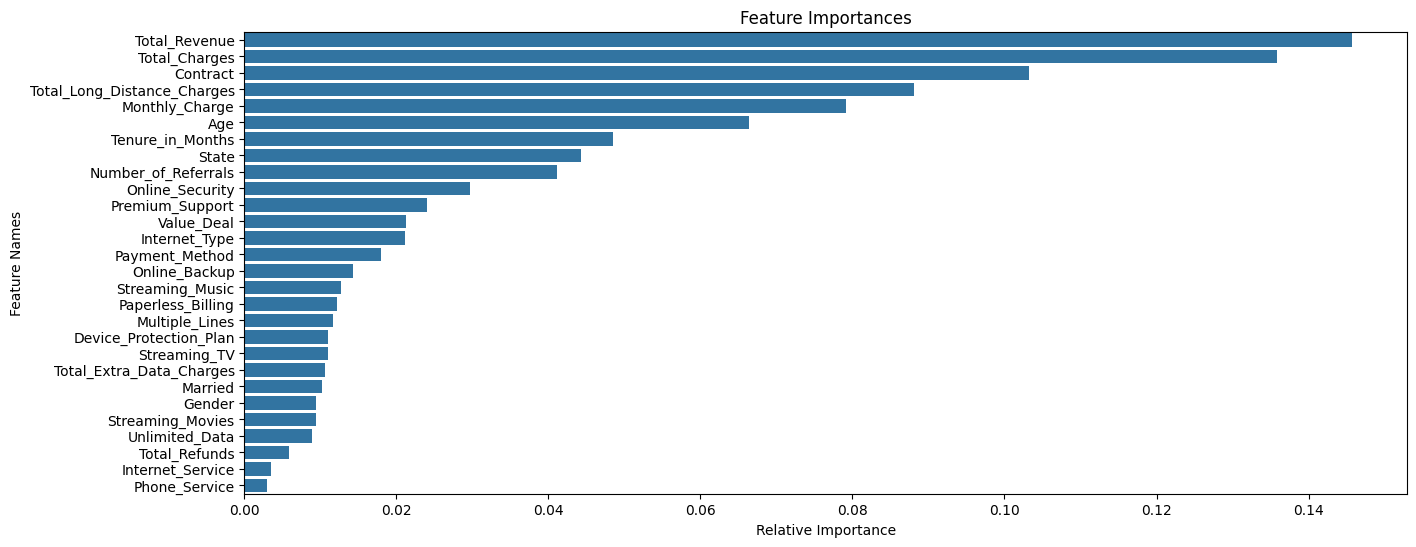

In [8]:
importances = rf_model.feature_importances_

indices = np.argsort(importances)[::-1]



# Plot the feature importances

plt.figure(figsize=(15, 6))

sns.barplot(x=importances[indices], y=X.columns[indices])

plt.title('Feature Importances')

plt.xlabel('Relative Importance')

plt.ylabel('Feature Names')

plt.show()

In [12]:
file_path = r"/content/Prediction.xlsx"
xls = pd.ExcelFile(file_path)

In [13]:
print("Available sheets:", xls.sheet_names)

Available sheets: ['Sheet1']


In [16]:
new_data = pd.read_excel(file_path, sheet_name="Sheet1")

In [17]:
original_data = new_data.copy()

In [18]:
customer_ids = new_data['Customer_ID']

In [19]:
new_data = new_data.drop(['Customer_ID', 'Customer_Status', 'Churn_Category', 'Churn_Reason'], axis=1)

In [23]:
for column in new_data.select_dtypes(include=['object']).columns:
    new_data[column] = new_data[column].fillna('Unknown')
    le = label_encoders[column]
    new_data[column] = new_data[column].apply(lambda x: x if x in le.classes_ else 'Unknown')
    if 'Unknown' not in le.classes_:
        le.classes_ = np.append(le.classes_, 'Unknown')
    new_data[column] = le.transform(new_data[column])

# Keep only the features used in training
new_data = new_data[X.columns]

# Make predictions
new_predictions = rf_model.predict(new_data)

# Add predictions to original_data
original_data['Customer_Status_Predicted'] = new_predictions

# Filter for Churned
churned_customers = original_data[original_data['Customer_Status_Predicted'] == 1]



In [25]:
original_data.to_csv(r"Final Prediction.csv", index=False)